# Do-It-Yourself

In this session, we will practice your skills in mapping with Python. Fire up a notebook you can edit interactively, and let's do this!



In [2]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import contextily as cx
import matplotlib.pyplot as plt

/home/tristannew/code/gds_course/.venv/lib/python3.12/site-packages/networkx/algorithms/operators/product.py:347: SyntaxWarning: invalid escape sequence '\ '
  """Returns the specified power of a graph.


In [64]:
osmnx.config(
    overpass_settings='[out:json][timeout:90][date:"2020-09-07T00:00:00Z"]'
)

/tmp/ipykernel_1647/3277903806.py:1: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  osmnx.config(


## Data preparation

### Polygons

For this section, you will have to push yourself out of the comfort zone when it comes to sourcing the data. As nice as it is to be able to pull a dataset directly from the web at the stroke of a url address, most real-world cases are not that straight forward. Instead, you usually have to download a dataset manually and store it locally on your computer before you can get to work.

We are going to use data from the Consumer Data Research Centre (CDRC) about Liverpool, in particular an extract from the Census. You can download a copy of the data at:

```{admonition} Important
You will need a username and password to download the data. Create it for free at:

> [https://data.cdrc.ac.uk/user/register](https://data.cdrc.ac.uk/user/register)
```

> [Liverpool Census'11 Residential data pack download](https://data.cdrc.ac.uk/system/files/Census_Residential_Data_Pack_2011/Census_Residential_Data_Pack_2011_E08000012.zip)

Once you have the `.zip` file on your computer, right-click and "Extract all". The resulting folder will contain all you need. For the sake of the example, let's assume you place the resulting folder in the same location as the notebook you are using. If that is the case, you can load up a `GeoDataFrame` of Liverpool neighborhoods with:

```python
import geopandas
liv = geopandas.read_file("Census_Residential_Data_Pack_2011_E08000012/data/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")
```

### Lines

For a line layer, we are going to use a different bit of `osmnx` functionality that will allow us to extract all the highways:

In [66]:
liv = geopandas.read_file("./data/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")

In [67]:
bikepaths = osmnx.graph_from_place("Liverpool, UK", network_type="bike")

---

Note the code cell above requires internet connectivity. If you are not online but have a full copy of the GDS course in your computer (downloaded as suggested in the [infrastructure page](../infrastructure)), you can read the data with the following line of code: 

In [68]:
bikepaths = osmnx.load_graphml("../data/web_cache/bikepaths_liverpool.graphml")

---

In [69]:
len(bikepaths)

23481

### Points

For points, we will use an analogue of the POI layer we have used in the [Lab](lab_C): pubs in Liverpool, as recorded by OpenStreetMap. We can make a similar query to retrieve the table:

In [70]:
pubs = osmnx.geometries_from_place(
    "Liverpool, UK", tags={"amenity": "bar"}
)

/tmp/ipykernel_1647/1601466028.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  pubs = osmnx.geometries_from_place(


````{attention}
:class: dropdown

If you are using an old version of `osmnx` (<1.0), replace the code in the cell above for:

```python
pubs = osmnx.pois.pois_from_place(
    "Liverpool, UK", tags={"amenity": "bar"}
)
```

You can check the version you are using with the following snipet:

```python
osmnx.__version__
```
````

---

Note the code cell above requires internet connectivity. If you are not online but have a full copy of the GDS course in your computer (downloaded as suggested in the [infrastructure page](../infrastructure)), you can read the data with the following line of code: 

In [7]:
pubs = geopandas.read_parquet("../data/web_cache/pois_bars_liverpool.parquet")

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---

## Tasks

### Task I: *Tweak your map*

With those three layers, try to complete the following tasks:

- Make a map of the Liverpool neighborhoods that includes the following characteristics:

    - Features a title
    - Does not include axes frame
    - It has a figure size of 10 by 11
    - Polygons are all in color `"#525252"` and 50% transparent
    - Boundary lines ("edges") have a width of 0.3 and are of color `"#B9EBE3"`
    - Includes a basemap with the [Stamen watercolor theme](https://contextily.readthedocs.io/en/latest/providers_deepdive.html#Overview-of-built-in-providers)
    
```{Note}
Not all of the requirements above are not equally hard to achieve. If you can get some but not all of them, that's also great! The point is you learn something every time you try.
```

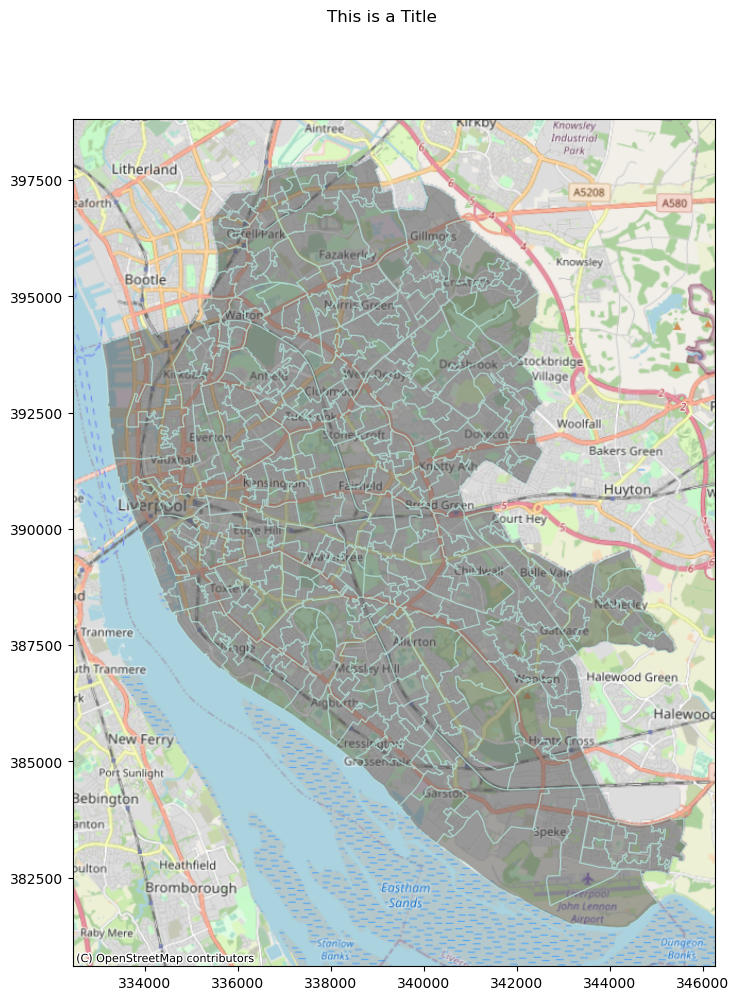

In [82]:
f, ax = plt.subplots(figsize=(10,11))
liv.plot(ax=ax, facecolor='#525252', edgecolor='#B9EBE3', alpha=0.5)
f.suptitle("This is a Title")
cx.add_basemap(ax=ax, crs=liv.crs, source=cx.providers.OpenStreetMap.Mapnik)
## Stamen is going to be deprecated by the looks of it?

### Task II: *Non-spatial manipulations*

For this one we will combine some of the ideas we learnt in the [previous block](../bB/lab_B) with this one.

Focus on the LSOA `liv` layer and use it to do the following:

1. Calculate the area of each neighbourhood
1. Find the five smallest areas in the table. Create a new object (e.g. `smallest` with them only)
1. Create a multi-layer map of Liverpool where the five smallest areas are coloured in red, and the rest appear in black.

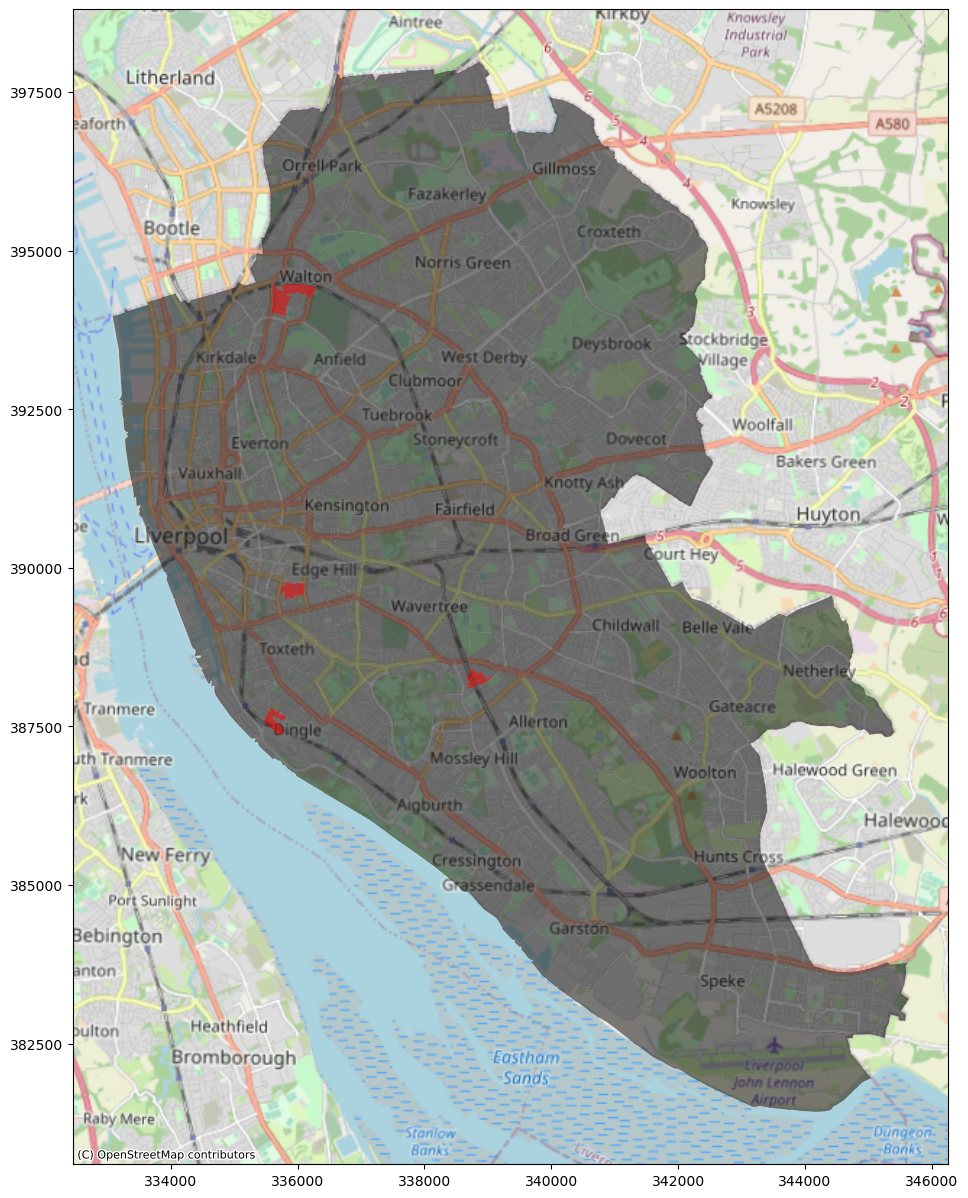

In [92]:
liv['areas'] = liv.area
smallest = liv.sort_values(by='areas', ascending=True).head()
f, ax = plt.subplots(figsize=(15,15))
liv.plot(ax=ax, color='black', alpha=0.5)
smallest.plot(ax=ax, color='red', alpha=0.5)
cx.add_basemap(ax=ax, crs=liv.crs, source=cx.providers.OpenStreetMap.Mapnik)

### Task III: *The gender gap on the streets*

This one is a bit more advanced, so don't despair if you can't get it on your first try. It also relies on the {ref}`streets dataset from the "Hands-on" section <lab_C:streets>`, so you will need to load it up on your own. Here're the questions for you to answer:

> *Which group accounts for longer total street length in Zaragoza: men or women? By how much*?

The suggestion is that you get to work right away. However, if this task seems too daunting, you can expand the tip below for a bit of help.

```{tip}
:class: dropdown

Answering those two questions involves the following steps:
1. You will need your spatial data projected, so they are expressed in metres, and the length calculation makes sense. Check out the {ref}`section on transforming the CRS <lab_C:to_crs>`, and use, for example `EPSG:25830` as the target CRS.
1. Separate streets named after men from those named after women, perhaps in two objects (`men`, `women`) that contain the streets for each group. This is a non-spatial query at its heart, so make sure to revisit {ref}`that section on the previous block <lab_B:condition_queries>`.
1. Calculate the length of each street in each group. Refresh your memory of this in {ref}`this section <lab_C:length>`.
1. Create a total length by group by adding the lengths of each street. This is again a non-spatial operation (sum), so make sure to re-read {ref}`this part <lab_B:new_columns>` of Block B.
1. Compare the two and answer the questions. 

Surprised by the solution? Perhaps not, but remember data analysis is not only about discovering the unexpected, but about providing evidence of the things we *"know"* so we can build better arguments about actions.
```

In [114]:
url = (
    "https://github.com/geochicasosm/lascallesdelasmujeres"
    "/raw/master/data/madrid/final_tile.geojson"
)
streets = gpd.read_file(url)
streets['length'] = streets.to_crs(25830).length
men = streets.query("gender == 'Male'")
women = streets.query("gender == 'Female'")

/home/tristannew/.local/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [117]:
print(streets.groupby('gender')['length'].mean())
print(streets.groupby('gender')['length'].sum())

gender
Female    145.626184
Male      142.852777
Name: length, dtype: float64
gender
Female    2.902330e+05
Male      1.198106e+06
Name: length, dtype: float64


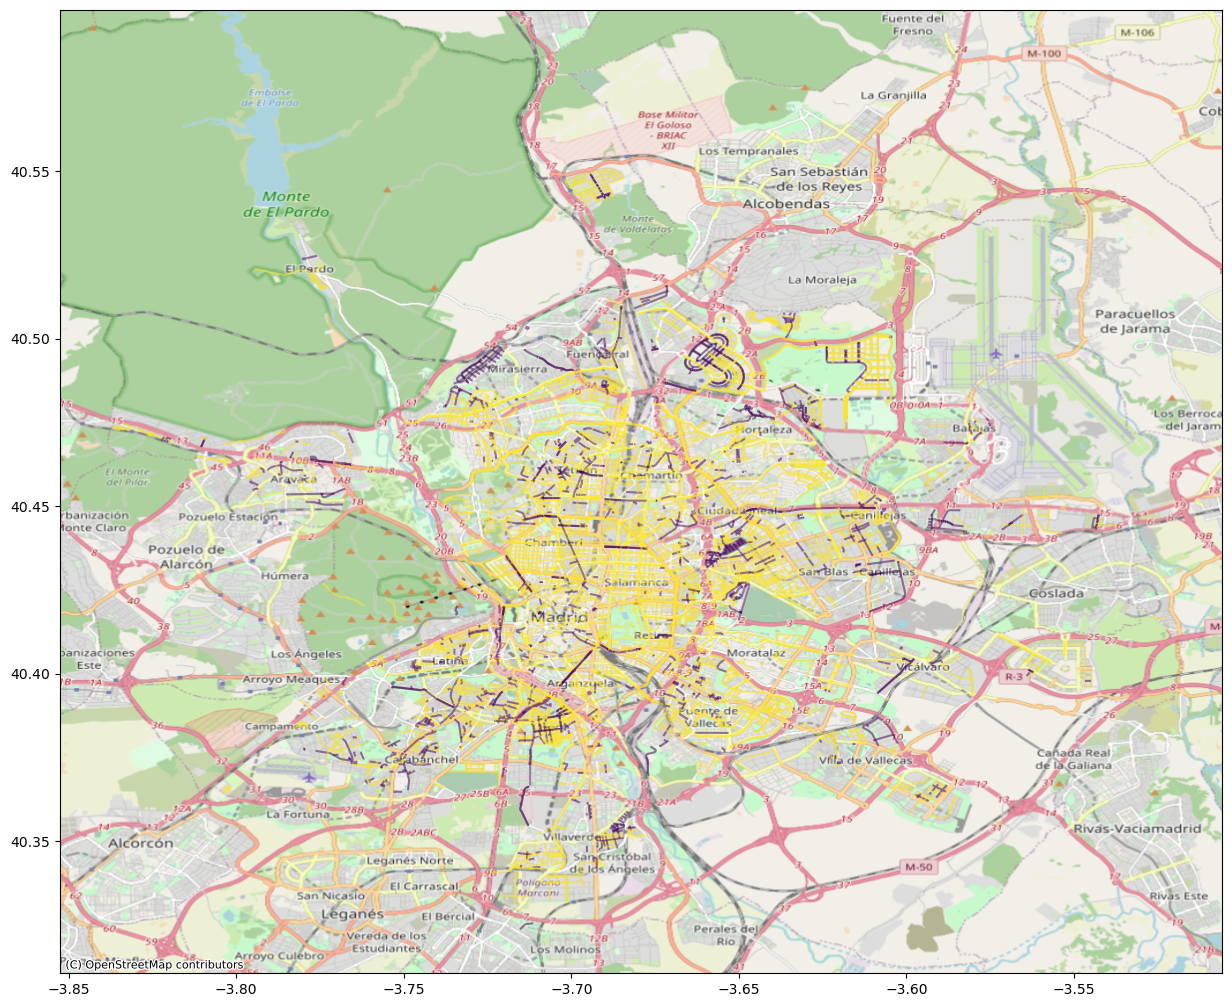

In [121]:
f, ax = plt.subplots(figsize=(15,15))
streets.plot(ax=ax, column=streets['gender'], cmap='viridis', alpha=0.5)
cx.add_basemap(ax=ax, crs=streets.crs, source=cx.providers.OpenStreetMap.Mapnik)

# End of Tasks

In [46]:
## My own exploration

poll = pd.DataFrame()
for i in range(1, 13):
    temp = pd.read_csv(f"./pollution_data/EDGARv6.1_BC_2018_{i}_ENE.txt", skiprows=2, sep=';')
    poll = pd.concat([poll, temp])

poll['geometry'] = gpd.points_from_xy(poll.lon, poll.lat)
gdf = gpd.GeoDataFrame(poll, geometry='geometry', crs='4326')

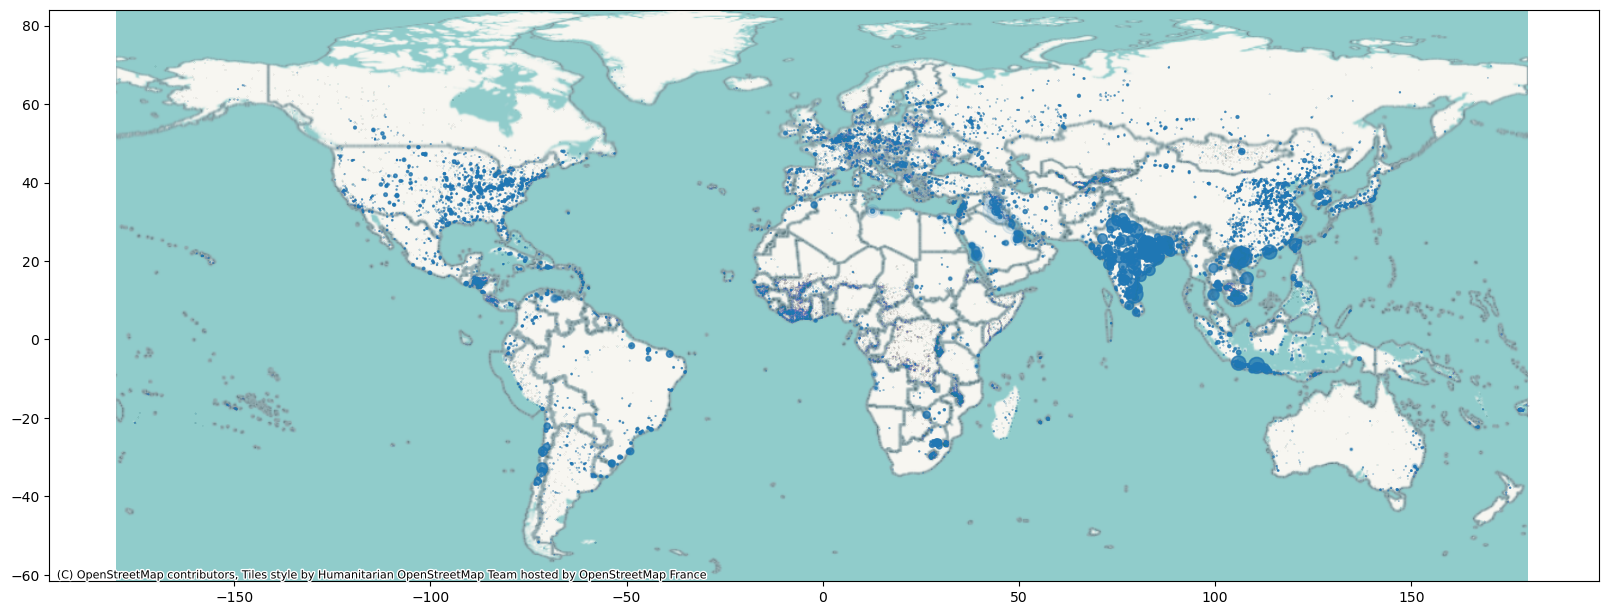

In [59]:
f, ax = plt.subplots(figsize=(20,20))
gdf.plot(ax=ax, markersize=poll['emission 2018 (tons)'], alpha=0.1)
cx.add_basemap(ax=ax, crs=gdf.crs)


In [3]:
place_name = "New York, USA"

# Download the data
G = ox.graph_from_place(place_name, network_type='all', retain_all=True)

# Get the nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

# Filter the edges for coastlines
coastal_edges = edges[edges["natural"] == "coastline"]

# Filter the nodes for coastal nodes
coastal_nodes = nodes[nodes.index.isin(coastal_edges[["u", "v"]].values.flatten())]

# Filter the nodes for land nodes
land_nodes = nodes[~nodes.index.isin(coastal_nodes.index)]

# Now you have the delineation between coastal and land nodes


KeyError: 'natural'